In [1]:
import numpy as np
import matplotlib.pyplot as  plt

# Sum

## Emap

In [2]:
# theoretical QFI
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('sum/rixs_Emap.npz')
rixs_con = np.load('sum/conjugate_rixs_Emap.npz')
rixs = dict(rixs)
rixs_pos = rixs['rixs']
rixs_con = dict(rixs_con)
rixs_neg = rixs_con['rixs']

omega = (rixs['omega']+11774.5) / 1000
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs_pos.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand_pos = rixs_pos * factor_reshaped
summand_neg = rixs_neg * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand_pos_chooser = summand_pos[:,chooser]
summand_neg_chooser = summand_neg[:,chooser]
nominator_pos = np.sum(summand_pos_chooser, axis=1)*step
nominator_neg = np.sum(summand_neg_chooser, axis=1)*step
nominator = nominator_pos + nominator_neg

# threshold
FQ_Emap = dict(np.load('sum/FQ_Emap.npz'))
FQ = FQ_Emap['FQ']

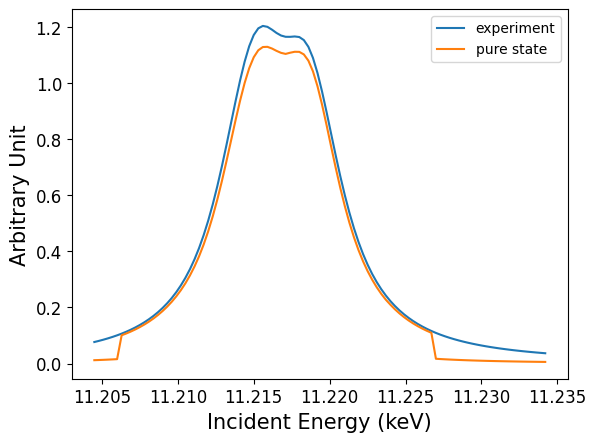

In [3]:
plt.plot(omega, nominator, label='experiment')
plt.plot(omega, FQ, label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

## Mmap

In [4]:
# momenta and angles
motors = np.vstack([[-0.37135718, -0.19678939, 0.0,  6.35613593, -93.84443325,  -35.71702316, -10.],
                    [-0.36642012, -0.20042758, 0.5,  6.70426443, -70.27088312, -112.93945895, -10.],
                    [-0.36148305, -0.20406577, 1.0,  7.69383586, -54.60755422, -102.08468304, -10.],
                    [-0.35654599, -0.20770396, 1.5,  9.11950715, -42.55814882,  -98.79459525, -10.],
                    [-0.35160893, -0.21134215, 2.0, 10.81173739, -33.62642692,  -97.21722821, -10.],
                    [-0.34667186, -0.21498034, 2.5, 12.66610405, -26.87058629,  -96.29276610, -10.],
                    [-0.34173480, -0.21861853, 3.0, 14.62328021, -21.57673293,  -95.68563709, -10.],
                    [-0.33679773, -0.22225672, 3.5, 16.64946876, -17.27553243,  -95.25647221, -10.],
                    [-0.33186067, -0.22589491, 4.0, 18.72485802, -13.66522264,  -94.93705831, -10.],
                    [-0.32692361, -0.22953311, 4.5, 20.83746597, -10.54905286,  -94.69008224, -10.],
                    [-0.32198654, -0.23317130, 5.0, 22.97986626,  -7.79546702,  -94.49341877, -10.],
                    [-0.31704948, -0.23680949, 5.5, 25.14739707,  -5.31403908,  -94.33311852, -10.],
                    [-0.31211241, -0.24044768, 6.0, 27.33714508,  -3.04092539,  -94.19995153, -10.],
                    [-0.30717535, -0.24408587, 6.5, 29.54734754,  -0.92991142,  -94.08756742, -10.],
                    [-0.30223829, -0.24772406, 7.0, 31.77702859,   1.05323073,  -93.99145380, -10.],
                    [-0.29730122, -0.25136225, 7.5, 34.02577160,   2.93438842,  -93.90831624, -10.],
                    [-0.29236416, -0.25500044, 8.0, 36.29357337,   4.73352253,  -93.83569342, -10.],
                    [-0.28742710, -0.25863863, 8.5, 38.58074920,   6.46630300,  -93.77170940, -10.],
                    [-0.28249003, -0.26227682, 9.0, 40.88787072,   8.14524100,  -93.71490943, -10.],
                    [-0.27739414882818690, -0.26597417911526850, 9.5104268416546700, 43.264375,  9.815250, -93.663173, -10.0],
                    [-0.26764896087249423, -0.27330293275657100, 10.510874050028260, 47.989750, 12.984500, -93.576479, -10.0],
                    [-0.25778835467293990, -0.28057927767632750, 11.510507877509921, 52.808000, 16.063875, -93.504979, -10.0],
                    [-0.24777219675676215, -0.28779323774242505, 12.509375498043902, 57.731750, 19.092500, -93.445016, -10.0],
                    [-0.23796699084652193, -0.29510625975440596, 13.509375345735329, 62.786750, 22.101000, -93.394073, -10.0],
                    [-0.22785287701054702, -0.30221098200350494, 14.507727481478634, 67.976875, 25.115875, -93.349547, -10.0],
                    [-0.22341693910140217, -0.30610439562840724, 15.009870255621223, 70.650125, 26.633375, -93.330210, -10.0],
                    [-0.21800221366851740, -0.30950033549205264, 15.507542476207073, 73.343000, 28.161500, -93.311360, -10.0],
                    [-0.21346254040160886, -0.31339680456990965, 16.009171507913727, 76.108250, 29.703375, -93.294785, -10.0],
                    [-0.20821606842705367, -0.31680014487519276, 16.507547237513325, 78.907625, 31.262125, -93.277723, -10.0],
                    [-0.20356182986295102, -0.32066862160791510, 17.008601568605542, 81.781875, 32.841000, -93.263260, -10.0],
                    [-0.19849298265545512, -0.32414055133336717, 17.507710839799360, 84.708125, 34.443750, -93.248066, -10.0],
                    [-0.19360491108270322, -0.32791598960334883, 18.007898567617170, 87.711875, 36.074250, -93.235229, -10.0],
                    [-0.18850285302241201, -0.33138267089740425, 18.506986904695648, 90.786375, 37.736750, -93.221660, -10.0],
                    [-0.18369770751773082, -0.33514959402719720, 19.007283337061917, 93.955875, 39.436125, -93.209960, -10.0],
                    [-0.17973557818122593, -0.33795464345342190, 19.406928947872096, 96.556750, 40.826125, -93.200047, -10.0]])
Ls = np.arange(0.,19.4,0.1)

In [5]:
# get the momenta
# rixs = np.load(witness.folder+'/rixs_Mmap.npz')
rixs = np.load('sum/rixs_Mmap.npz')
momenta = np.sqrt(np.sum(rixs['Qs'] * rixs['Qs'],axis=1))

In [6]:
# theoretical QFI
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('sum/rixs_Mmap.npz')
rixs_con = np.load('sum/conjugate_rixs_Mmap.npz')
rixs = dict(rixs)
rixs_pos = rixs['rixs']
rixs_con = dict(rixs_con)
rixs_neg = rixs_con['rixs']

d = 2.7
Lfactor = 0.436029515 * d / (2*np.pi)
Ls = np.arange(0.0, 20.1, 0.1)
momenta = np.sqrt(np.sum(rixs['Qs'] * rixs['Qs'],axis=1))
newmomenta = Ls * Lfactor
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs_pos.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand_pos = rixs_pos * factor_reshaped
summand_neg = rixs_neg * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand_pos_chooser = summand_pos[:,chooser]
summand_neg_chooser = summand_neg[:,chooser]
nominator_pos = np.sum(summand_pos_chooser, axis=1)*step
nominator_neg = np.sum(summand_neg_chooser, axis=1)*step
nominator = nominator_pos + nominator_neg

# threshold
FQ_Mmap = dict(np.load('sum/FQ_Mmap.npz'))
FQ = FQ_Mmap['FQ']

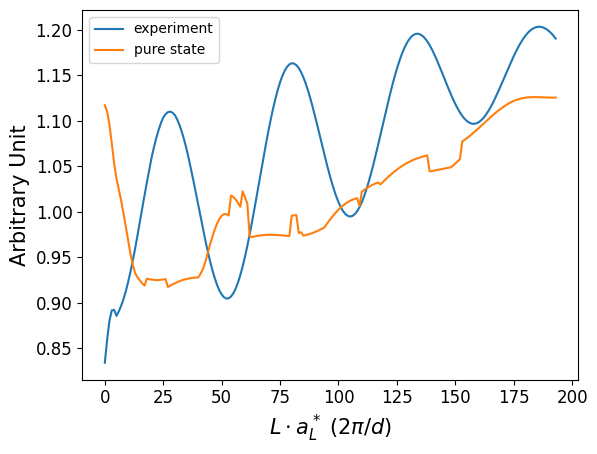

In [7]:
plt.plot(nominator, label='experiment')
plt.plot(FQ, label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

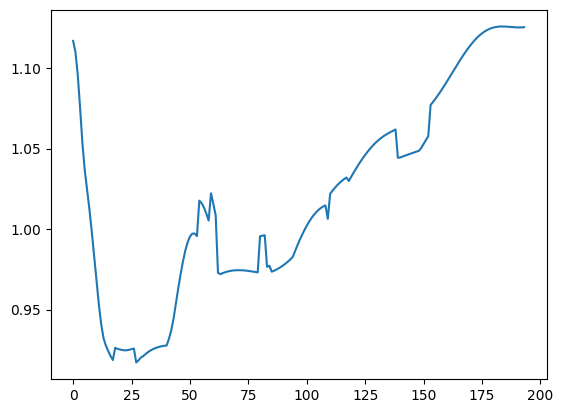

In [10]:
plt.plot(FQ)

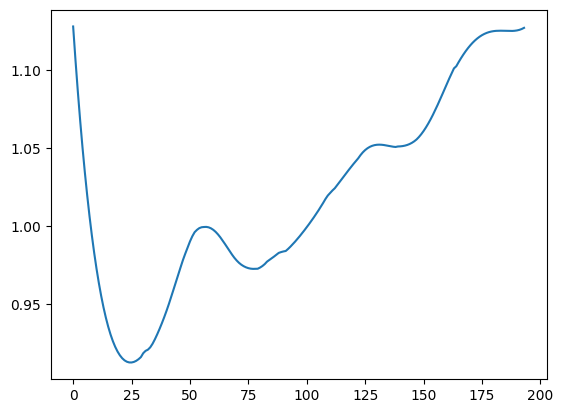

In [39]:
from scipy.signal import savgol_filter

FQ_smooth = savgol_filter(FQ, window_length=60, polyorder=4)
plt.plot(FQ_smooth)

# Polarization

## Emap

In [11]:
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('pol/rixs_Emap.npz')
rixs_con = np.load('pol/conjugate_rixs_Emap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs'][0]
rixs2 = rixs['rixs'][1]
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs'][0]
rixs2_con = rixs_con['rixs'][1]

omega = (rixs['omega']+11774.5) / 1000
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand1 = rixs1 * factor_reshaped + rixs1_con * factor_reshaped
summand2 = rixs2 * factor_reshaped + rixs2_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand1_chooser = summand1[:,chooser]
summand2_chooser = summand2[:,chooser]
nominator1 = np.sum(summand1_chooser, axis=1)*step
nominator2 = np.sum(summand2_chooser, axis=1)*step

# threshold
FQ_Emap = dict(np.load('pol/FQ_Emap.npz'))
FQ = FQ_Emap['FQ']

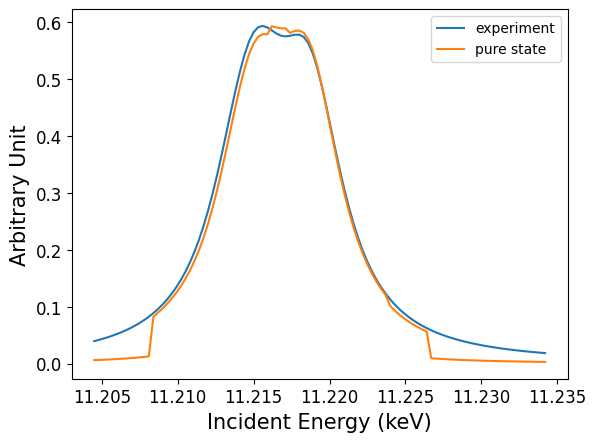

In [12]:
plt.plot(omega, nominator1, label='experiment')
plt.plot(omega, FQ[0], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

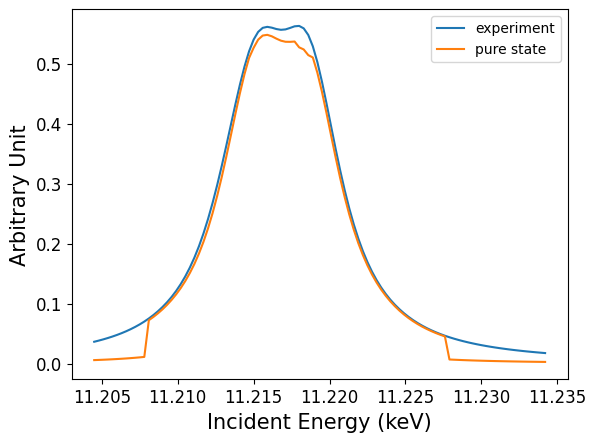

In [13]:
plt.plot(omega, nominator2, label='experiment')
plt.plot(omega, FQ[1], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

## Mmap

In [14]:
# incident energy
Ei=-558.5
print((Ei+11774.5)/1000)

# momenta and angles
Ls = np.arange(0.0, 20.1, 0.1)
Qs = np.sqrt(1.228965**2/4+(Ls*0.4263978)**2)
tths = np.rad2deg(np.arcsin(1.1054837271511369*Qs/4./np.pi)*2)
thins = tths/2 - np.rad2deg(np.arctan(1.228965/2/Ls/0.4263978))

11.216


/var/folders/rt/rmgcw59j4lv9kkg3_40qtsgr0000gp/T/ipykernel_61713/89235229.py:9: RuntimeWarning: divide by zero encountered in divide
  thins = tths/2 - np.rad2deg(np.arctan(1.228965/2/Ls/0.4263978))


In [18]:
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

# rixs = np.load(witness.folder+'/rixs_Emap.npz')
rixs = np.load('pol/rixs_Mmap.npz')
rixs_con = np.load('pol/conjugate_rixs_Mmap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs'][:,0,:]
rixs2 = rixs['rixs'][:,1,:]
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs'][:,0]
rixs2_con = rixs_con['rixs'][:,1]

# momenta = rixs['momenta']
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand1 = rixs1 * factor_reshaped + rixs1_con * factor_reshaped
summand2 = rixs2 * factor_reshaped + rixs2_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand1_chooser = summand1[:,chooser]
summand2_chooser = summand2[:,chooser]
nominator1 = np.sum(summand1_chooser, axis=1)*step
nominator2 = np.sum(summand2_chooser, axis=1)*step

# threshold
FQ_Emap = dict(np.load('pol/FQ_Mmap.npz'))
FQ = FQ_Emap['FQ']

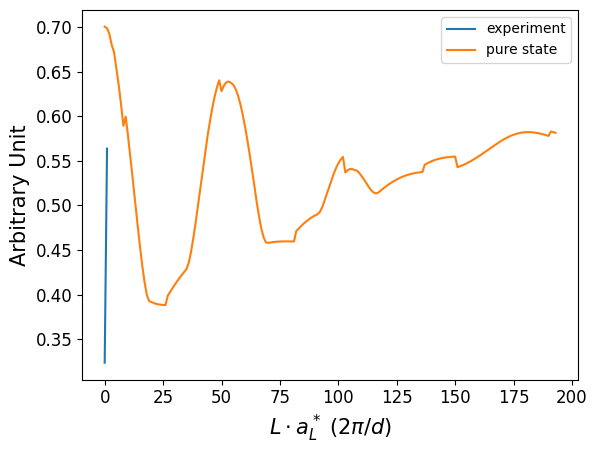

In [19]:
plt.plot(nominator1, label='experiment')
plt.plot(FQ[0], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

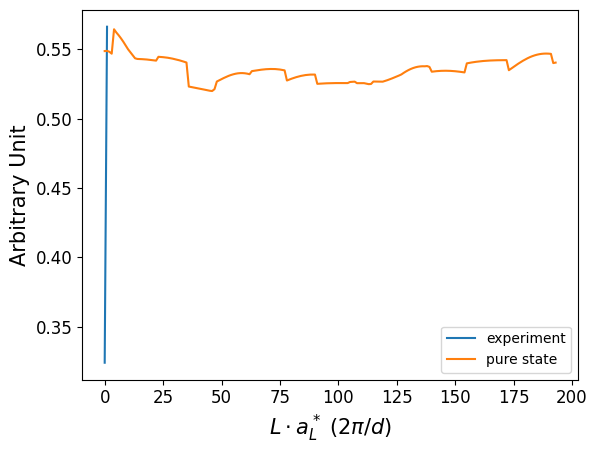

In [20]:
plt.plot(nominator2, label='experiment')
plt.plot(FQ[1], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()